In [ ]:
import math
import matplotlib
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import random as rn
import time
import statistics as stat
from scipy.integrate import quad
from scipy.optimize import minimize_scalar
import ipywidgets as widgets
from IPython.display import clear_output

# Численные методы

## Лаб 1

### Часть 2

Вычисление интеграла $$ \int_{0}^{1}{0,37e^{sin(x)}dx} $$


**Точное значение интеграла указана в выводе ниже**

In [ ]:
f = lambda x: 0.37 * np.exp(np.sin(x))

a = 0
b = 1

result, error = quad(f, a, b)
print(f"Значение интеграла: {result:.7f}")
print(f"Оценка погрешности: {error:.7f}")

Значение интеграла: 0.6037918
Оценка погрешности: 0.0000000


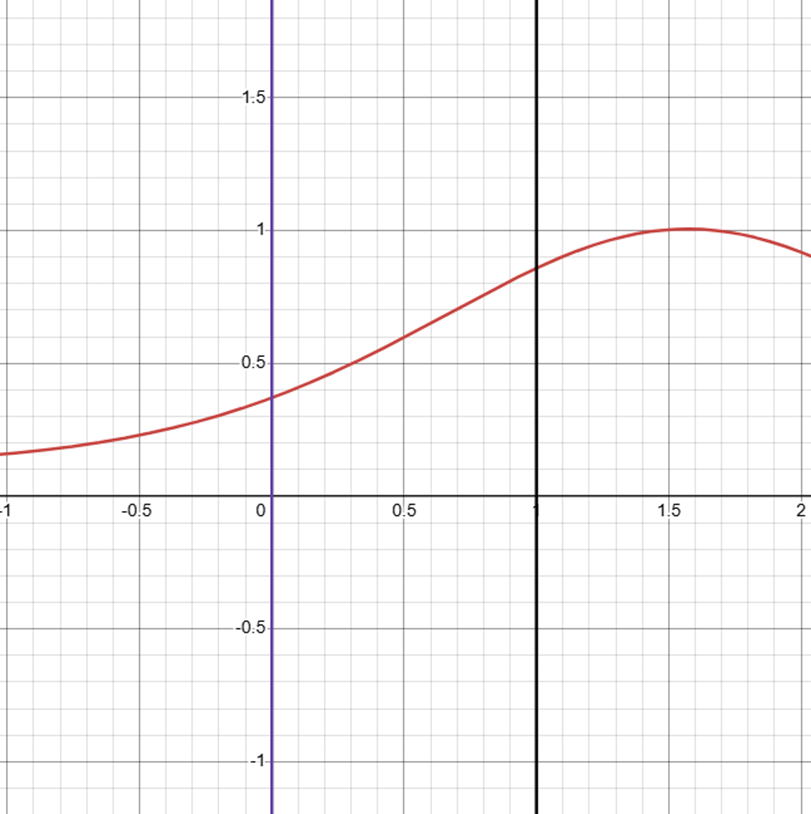

Далее будет приведена точность этого интеграла с применением различных численных методов. Более подробные рассчёты есть в электронной таблице.

#### Разбиение по формулам прямоугольников

**Точность по формуле левого прямоугольника при разбиении на 10 частей**

> $$ \int_{0}^{1}{0,37e^{sin(x)}dx} = 0,592\pm0,012 $$

**Точность по формуле правого прямоугольника при разбиении на 10 частей**

> $$ \int_{0}^{1}{0,37e^{sin(x)}dx} = 0,616\pm0,012 $$

**Точность по формуле центрального прямоугольника при разбиении на 10 частей**

> $$ \int_{0}^{1}{0,37e^{sin(x)}dx} = 0,603782\pm0,0000098 $$

Наиболее точным из трёх методов вычисления через прмяоугольники - это **метод центрального прямоугольника**

Вычисление погрешности для этих методов происходило по правилу Рунге, где
$ |I_n-I_{2n}| $ для правых и левых прямоугольников и $ \frac{|I_n-I_{2n}|}{3}
$ для центральных


#### Разбиение по формуле трапеции

После вычислений мы получаем значение: $$0,6038701$$, что очень близко, но менее точно, чем центральные прямоугольники.
Погрешность мы вычислим по формуле, использующей оценку второй производной.
Для начала дважды найдём производную от формулы:
  $$ f'(x) = 0,37e^{sinx}cosx $$
  $$ f''(x) = 0,37(e^{sinx}cos^2x-e^{sinx}sinx) $$

После вычисления погрешности получаем точность
> $$ \int_{0}^{1}{0,37e^{sin(x)}dx} = 0,60387\pm0,00039 $$

#### Разбиение по формуле Симпсона

После вычислений мы получаем значение: $$0,6037917$$

Это самое точное значение из всех пяти методов.

Для нахождения погрешности нам необходимо вычислить функцию вплоть до четвёртой производной:
$$f'''(x)=0,37(e^{sinx}cos^3x-3e^{sinx}cosxsinx-e^{sinx}cosx)$$
$$f^{(IV)}(x)=0,37e^{sinx}(cos^4x-6cos^2xsinx-4cos^2x+3sin^2x+sinx)$$

и посчитать её по формуле $$\Delta_3\le \frac{h^4}{180}*(b-a)*max_{[a,b]}|f^{(4)}(x)|$$

После вычисления погрешности получаем точность
> $$ \int_{0}^{1}{0,37e^{sin(x)}dx} = 0,6037917\pm0,0000001 $$

#### Итог

Самым точным методом для данного выражения оказался **метод Симпсона** с погрешностью всего в одну десятимиллионную.
А самым неточным методом для данного выражения оказался метод **правых прямоугольников**.

### Часть 3

#### Вычисление интеграла методом Монте-Карло

In [ ]:
def generateArguments(a, b, countTests):
  arguments = []
  for i in range(0, countTests):
    arguments.append(rn.uniform(a, b))
  return arguments

def calculateMeanings(func, arguments, x):
  meanings = []
  i = len(arguments)
  j = 0
  for argument in arguments:
    temp = func.subs(x, argument)
    meanings.append(temp)
    # i = i + 1
    # if(i%1000 == 0):
    #   j = j + 10
    #   print(str(j) + "%")
  return meanings

def mathExpectation(meanings):
  return np.mean(meanings)



# начальные условия
try:
  print("Введите подынтегральную функцию, используя в качестве аргумента x")
  func = sp.sympify(input())
  print("Введите левую границу a")
  a = int(input())
  print("Введите правую границу b")
  b = int(input())
  print("Введите количество испытаний для метода Монте-Карло")
  countTests = int(input())
  print("Сколько раз вы хотите провести экспеиметр для N-го числа испытаний?")
  countExperiment = int(input())
except:
  print("Ошибка инициализации!")


x = sp.symbols('x')
func_numeric = sp.lambdify(x, func, "numpy")

# вычисление корректного значения
correctValue, err = quad(func_numeric, a, b)


# построение графика
plt_x = np.linspace(a-1, b+1, 1000)
plt_y = func_numeric(plt_x)
plt.plot(plt_x, plt_y)
plt.axhline(color="blue")
plt.axvline(color="blue")
plt.axvline(a, color="black", linestyle="--", label="a")
plt.axvline(b, color="black", linestyle="--", label="b")
plt.fill_between(plt_x, plt_y, where=[(x_1 > a) and (x_1 < b) for x_1 in plt_x])

# эксперименты
resultsArray = []
for i in range(0, countExperiment):
  print()
  arguments = generateArguments(a, b, countTests)
  meanings = calculateMeanings(func, arguments, x)
  mathExpec = mathExpectation(meanings)
  result = mathExpec*(b-a)
  print(str(i+1) + ')' + str(result))
  resultsArray.append(result)

# отчёт
arithmeticMean = np.mean(resultsArray)
error = abs(correctValue-arithmeticMean)

plt.axhline(arithmeticMean, color="red") # мат-ожидание

print("Отчёт:")
print(f"Для функции {func} на интервале от {a} до {b}, точное значение которой равняется {correctValue:.10f}, при количестве случайных испытаний в {countTests} было проведено {countExperiment} экспериментов.\nВ результате было вычислено среднее арифметическое, которое равняется \n {arithmeticMean:.10f}\nПогрешность составила {error:.10f}")
plt.show()
print("Красной линией указано мат.ожидание")


Введите подынтегральную функцию, используя в качестве аргумента x
Ошибка инициализации!


NameError: name 'func' is not defined

Вот несколько отчётов из выводов программы:

№1

"Для функции 0.37*exp(sin(x)) на интервале от 0 до 1, точное значение которой равняется 0.6037917551, при количестве случайных испытаний в 100 было проведено 100 экспериментов.

В результате было вычислено среднее арифметическое, которое равняется
 0.6039528057

Погрешность составила 0.0001610506"

№2

"Для функции 0.37*exp(sin(x)) на интервале от 0 до 1, точное значение которой равняется 0.6037917551, при количестве случайных испытаний в 100 было проведено 1 экспериментов.

В результате было вычислено среднее арифметическое, которое равняется
 0.6247548728

Погрешность составила 0.0209631177"

№3

"Для функции 0.37*exp(sin(x)) на интервале от 0 до 1, точное значение которой равняется 0.6037917551, при количестве случайных испытаний в 1000 было проведено 1 экспериментов.

В результате было вычислено среднее арифметическое, которое равняется
 0.6048828932

Погрешность составила 0.0010911381"

№4

"Для функции 0.37*exp(sin(x)) на интервале от 0 до 1, точное значение которой равняется 0.6037917551, при количестве случайных испытаний в 10000 было проведено 1 экспериментов.

В результате было вычислено среднее арифметическое, которое равняется
 0.6033357991

Погрешность составила 0.0004559560"

№5

"Для функции 0.37*exp(sin(x)) на интервале от 0 до 1, точное значение которой равняется 0.6037917551, при количестве случайных испытаний в 1000000 было проведено 1 экспериментов.

В результате было вычислено среднее арифметическое, которое равняется
 0.6039301312

Погрешность составила 0.0001383761"

Из экспериментов мы можем прикинуть среднее число испытаний для необходимой точности:

Для $ϵ = 10^{-2} $ среднее N будет порядка 10^3

Для $ϵ = 10^{-4} $ среднее N будет порядка 10^6

#### Вычисление интеграла численными методами

###### Реализация

In [ ]:
# Стиль кнопок
layout = widgets.Layout(width='auto', height='auto')

# Инициализация переменных
method = -1
function = 0 # Функция
function_simpy = None
text_input = None # Поле ввода функции
h_input = None # Поле ввода шага
eps_input = None # Поле ввода точности
currentMethod = None # Текущий метод
koeff = {1:1, 2:1, 3:2, 4:2, 5:4}
visualisationToggle = False # Глобальная визуализация
a_bor = None
b_bor = None

x = sp.symbols('x') # Обозначение переменной

# Инициализация кнопок
button1 = widgets.Button(description="Метод левых прямоугольников", layout=layout)
button2 = widgets.Button(description="Метод правых прямоугольников", layout=layout)
button3 = widgets.Button(description="Метод центральных прямоугольников", layout=layout)
button4 = widgets.Button(description="Метод трапеций", layout=layout)
button5 = widgets.Button(description="Метод парабол", layout=layout)
button6 = widgets.Button(description="Вернуться к выбору метода", layout=layout)
button7 = widgets.Button(description="Вычислить", layout=layout)
button8 = widgets.Button(description="Визуализировать", layout=layout)

sliderA = widgets.FloatSlider(value=0, min=-20, max=20, step=0.1, description='a:')
sliderB = widgets.FloatSlider(value=3, min=-20, max=20, step=0.1, description='b:')
sliderN = widgets.IntSlider(value=4, min=1, max=50, step=1, description='n:')

h_input = widgets.Text(value="", description='h: ')
eps_input = widgets.Text(value="", description='eps: ')

button1.on_click(lambda b: [globals().update({"method": 1}), checkError(method)])
button2.on_click(lambda b: [globals().update({"method": 2}), checkError(method)])
button3.on_click(lambda b: [globals().update({"method": 3}), checkError(method)])
button4.on_click(lambda b: [globals().update({"method": 4}), checkError(method)])
button5.on_click(lambda b: [globals().update({"method": 5}), checkError(method)])
button6.on_click(lambda b: [clear_output(wait=True), choseMethod()])
button7.on_click(lambda b: calculateRunge())
button8.on_click(lambda b: toggleVisualisation())

In [ ]:
# ПОДСЧЁТ ПОГРЕШНОСТИ МЕТОДОМ РУНГЕ

def RungeError(integralN, integral2N):
  k = koeff[int(currentMethod)]
  error = (1/(pow(2, k)-1)) * abs(integralN - integral2N)
  return error

In [ ]:
# ФУНКЦИИ ОТВЕЧАЮЩИЕ ЗА РАССЧЁТ С ИСПОЛЬЗОВАНИЕМ ШАГА

def correctFloat(float_num): # Проверка корректности шага
  try:
    float_num = float(float_num)
    return float_num
  except:
    return 0

def recalculateHN(a, b, n, h): # Пересчёт количества разбиений при указании шага
  last_point = b
  if(h != 0):
    n = math.floor(abs(a-b)/h)
    last_point = a+n*h # Последняя точка при перессчитанном количестве разбиений
  else:
    h = (b-a)/n # Если шаг не был указан
  return h, n, last_point

In [ ]:
# РАССЧЁТ КОЛИЧЕСТВА РАЗБИЕНИЙ ЧЕРЕЗ ПРАВИЛО РУНГЕ

def calculateRunge():
  k = koeff[int(currentMethod)]
  a = float(sliderA.value)
  b = float(sliderB.value)
  n = int(sliderN.value)
  eps = float(eps_input.value)
  integralN = calculateIntegral(a, b, n, 0)
  integral2N = calculateIntegral(a, b, 2*n, 0)
  print("Отладка при автоматическом вычислении количества разбиений:")
  while(abs(integralN-integral2N) > ((pow(2, k)-1) * eps)):
    print(f"{abs(integral2N-integralN)} > {(pow(2, k)-1) * eps}")
    integralN = integral2N
    n = 2*n
    integral2N = calculateIntegral(a, b, 2*n, 0)
  print(f"{abs(integral2N-integralN)} < {(pow(2, k)-1) * eps}")
  sliderN.value = n

In [ ]:
def leftRectangleMethod(a, n, h):
  integral = 0
  for i in range(n):
    integral += function.subs(x, a+i*h)*h
  return integral

In [ ]:
def rightRectangleMethod(a, n, h):
  integral = 0
  for i in range(n):
    integral += function.subs(x, a+(i+1)*h)*h
  return integral

In [ ]:
def centerRectangleMethod(a, n, h):
  integral = 0
  for i in range(n):
    integral += function.subs(x, a+(i+0.5)*h)*h
  return integral

In [ ]:
def trapezoidMethod(a, n, h):
  integral = 0
  for i in range(n):
    integral += (function.subs(x, a+i*h)+function.subs(x, a+(i+1)*h))*h/2
  return integral

In [ ]:
def parabolasMethod(a, b, n, h):
  if n%2 != 0:
    n += 1
    h = (b-a)/n
  integral = 0
  if(n != 0): # Для исключения случайного подсчёта при превышении h(в случае, если n=0).
    integral = function.subs(x, a) + function.subs(x, b)
    for i in range(1, n):
      if i%2 == 0:
        integral = integral + 2*function.subs(x, a + i*h)
      else:
        integral = integral + 4*function.subs(x, a + i*h)
    integral = integral * h/3
  return integral

In [ ]:
def checkPositive(a, b): # Проверка на положительность функции
  global a_bor, b_bor
  try:
    a_bor = a
    b_bor = b
    if(minimize_scalar(function_simpy, bounds=(a, b), method='bounded').fun > 0):
      return True
    else:
      return False
  except:
    return checkPositive(b, a)

In [ ]:
def toggleVisualisation():
  global visualisationToggle
  if(visualisationToggle == True):
    visualisationToggle = False
  else:
    visualisationToggle = True

def vizualisation():
  a = a_bor
  b = b_bor
  n = sliderN.value

  # Создаем график
  fig, ax = plt.subplots(figsize=(10, 6))
  x_vals = np.linspace(a, b, 1000)
  y_vals = function_simpy(x_vals)
  ax.plot(x_vals, y_vals, 'b-', label='f(x)')

  h = (b - a) / n
  x_points = np.linspace(a, b, n+1)

  match currentMethod:
    case 1:
      for i in range(n):
          x_left = x_points[i]
          y_left = function_simpy(x_left)
          ax.add_patch(plt.Rectangle((x_left, 0), h, y_left,
                                edgecolor='r', facecolor='red', alpha=0.3))
          ax.plot([x_left, x_left], [0, y_left], 'r-')
      ax.set_title(f'Метод левых прямоугольников (n={n})')
    case 2:
      for i in range(n):
          x_right = x_points[i+1]
          y_right = function_simpy(x_right)
          ax.add_patch(plt.Rectangle((x_points[i], 0), h, y_right,
                                edgecolor='g', facecolor='green', alpha=0.3))
          ax.plot([x_right, x_right], [0, y_right], 'g-')
      ax.set_title(f'Метод правых прямоугольников (n={n})')
    case 3:
      for i in range(n):
          x_center = (x_points[i] + x_points[i+1]) / 2
          y_center = function_simpy(x_center)
          ax.add_patch(plt.Rectangle((x_points[i], 0), h, y_center,
                                edgecolor='m', facecolor='purple', alpha=0.3))
          ax.plot([x_center, x_center], [0, y_center], 'm-')
      ax.set_title(f'Метод центральных прямоугольников (n={n})')
    case 4:
      for i in range(n):
          y0, y1 = function_simpy(x_points[i]), function_simpy(x_points[i+1])
          ax.fill_between([x_points[i], x_points[i+1]], [y0, y1],
                          color='orange', alpha=0.3)
          ax.plot([x_points[i], x_points[i+1]], [y0, y1], 'orange')
      ax.set_title(f'Метод трапеций (n={n})')
    case 5:
      # Гарантируем четное количество интервалов
      n = n if n % 2 == 0 else n + 1
      h = (b - a) / n
      x_points = np.linspace(a, b, n+1)

      # Убедимся, что есть хотя бы 2 интервала
      if n < 2:
          n = 2
          h = (b - a) / n
          x_points = np.linspace(a, b, n+1)

      for i in range(0, n, 2):
          x0, x1, x2 = x_points[i], x_points[i+1], x_points[i+2]
          y0, y1, y2 = function_simpy(x0), function_simpy(x1), function_simpy(x2)

          # Коэффициенты параболы в виде a(x - x1)^2 + b(x - x1) + c
          a_coef = (y0 - 2*y1 + y2) / (2*h**2)
          b_coef = (y2 - y0) / (2*h)
          c_coef = y1

          # Генерация точек параболы
          x_parabola = np.linspace(x0, x2, 100)
          y_parabola = a_coef*(x_parabola - x1)**2 + b_coef*(x_parabola - x1) + c_coef

          # Отрисовка
          ax.plot(x_parabola, y_parabola, 'r--', lw=2, alpha=0.7)
          ax.fill_between(x_parabola, y_parabola, alpha=0.2, color='orange')
          ax.scatter([x0, x1, x2], [y0, y1, y2], color='purple', zorder=3)

      ax.set_title(f'Метод парабол (n={n})')
      ax.set_ylim(min(y_vals)-1, max(y_vals)+1)

  # Общие элементы графика
  ax.set_xlim(a - 0.1*(b-a), b + 0.1*(b-a))
  ax.set_ylim(0, max(y_vals)*1.1)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend()
  ax.grid(True)
  plt.show()

In [ ]:
def choseMethod(): # Функция выбора метода и ввода функции
  global text_input
  global function
  print("Введите функцию")
  text_input = widgets.Text(value=str(function))
  text_input.disabled = False
  display(text_input)
  print("А затем выберите метод")
  display(widgets.HBox([button1, button2, button3, button4, button5]))

# Проверка ошибки
def checkError(method): # Принимает поле ввода. Если его значение корректное, вызывает функцию рассчётов, иначе повторный вызов функции ввода
  try:
    global text_input
    global function
    global function_simpy
    function = text_input.value
    function = sp.simplify(function)
    function_simpy = sp.lambdify(x, function, 'numpy') # Конвертация в числовую функцию
    text_input.value = str(function)
    calculateInterface(method)
  except:
    clear_output()
    print("Ошибка ввода функции")
    choseMethod()

# Интерфейс подсчёта интеграла и визуализации
def calculateInterface(method):
  global text_input
  global h_input
  global currentMethod # Текущий метод
  currentMethod = method
  clear_output()
  print("Функция")
  text_input.disabled = True # Блокировка ввода
  display(text_input)

  display(widgets.HBox([eps_input, button7])) # Подсчёт по правилу Рунге
  display(button8)
  print("Для автоматичечского вычисления шага на отрезке через погрешность по правилу Рунге введите значение выше и нажмите на кнопку 'Вычислить'.")

  if not hasattr(calculateInterface, 'interactive_widget'): # Поиск кэшированного объекта
    calculateInterface.interactive_widget = widgets.interactive(puppetMenu, a=sliderA, b=sliderB, n=sliderN, h_custom=h_input)
  display(calculateInterface.interactive_widget) # Подключение интерфейса (слайдеров)

  display(button6)

def puppetMenu(a, b, n, h_custom):
  global a_bor, b_bor
  if(sliderA.value > sliderB.value):
    a_bor, b_bor = sliderB.value, sliderA.value
  else:
    a_bor, b_bor = sliderA.value, sliderB.value
  h_custom = correctFloat(h_custom)
  print("При необходимости, Вы можете указать шаг вручную в поле h. Оставьте поле h пустым, если хотите, чтобы рассчёты выполнялись по количеству разбиений. Некорректно введённое значение также учитываться не будет.")
  integralN = calculateIntegral(a, b, n, h_custom)
  integral2N = calculateIntegral(a, b, 2*n, h_custom/2)
  print(f"\nИтоговое значение: {integralN}")
  error = RungeError(integralN, integral2N)  # Подсчёт погрешности
  print(f"\nПогрешность по правилу Рунге: {error}")
  print(f"\nУточнённое значение: {integral2N}+-{error}\n")
  if(checkPositive(a, b)):
    if(visualisationToggle == True):
      vizualisation()
  else:
    print("Функция на отрезке [a, b] не положительна. Визуализация невозможна")

def calculateIntegral(a, b, n, h_custom):
  a = a_bor
  b = b_bor
  global currentMethod
  h, n, last_point = recalculateHN(a, b, n, h_custom) # Пересчёт количества разбиений

  match currentMethod:
    case 1:
      integral = leftRectangleMethod(a, n, h)  # Вызов нужной формулы в зависимости от выбранного метода
      integral += leftRectangleMethod(last_point, 1, abs(b-last_point)) # Для вычисления остатка (n=1/ h=b-last_pint) при указании шага, где last_point-последняя задействованная точка перед b. При превышении шага last_point=a, а h=b-a. Следовательно, n=целая часть+остаток=0+1
    case 2:
      integral = rightRectangleMethod(a, n, h)
      integral += rightRectangleMethod(last_point, 1, abs(b-last_point))
    case 3:
      integral = centerRectangleMethod(a, n, h)
      integral += centerRectangleMethod(last_point, 1, abs(b-last_point))
    case 4:
      integral = trapezoidMethod(a, n, h)
      integral += trapezoidMethod(last_point, 1, abs(b-last_point))
    case 5:
      integral = parabolasMethod(a, last_point, n, h)
      integral += parabolasMethod(last_point, b, 1, abs(b-last_point))

  return integral

###### Запуск программы

К сожалению, оптимизации добиться не удалось, поэтому приходится ждать :с

Проблема: при переключении методов скорость отрисовки графика уменьшается

Ps: Удалось починить программу. Проблема заключалась в постоянном создании объекта interactive. Решение: повтрный вызов interactive из хэша функции.

In [ ]:
choseMethod()

Введите функцию


Text(value='x**2 + y')

А затем выберите метод


## Лаб 2

Вычисление интеграла $$ \int^1_0dy\int^y_0\sqrt{x^2+y^2}dx $$ через триангуляцию нерегулярной области.

In [ ]:
BY = [[0, 0.5], [0.5, 0.5], [0.5, 0]] # Соотношения
SUMM = 0 # Итоговая сумма
FUNCTION = None
SOLUTION = 0.3825978

In [ ]:
def calculateFunction(x, y):
  return FUNCTION(x, y)

In [ ]:
# Вычисляет площадь и определяет общую вершину катетов
def squareTriangle(coordinates):
  a = math.sqrt(math.pow(coordinates[2][0] - coordinates[0][0], 2) + math.pow(coordinates[2][1] - coordinates[0][1], 2))
  b = math.sqrt(math.pow(coordinates[2][0] - coordinates[1][0], 2) + math.pow(coordinates[2][1] - coordinates[1][1], 2))
  c = math.sqrt(math.pow(coordinates[1][0] - coordinates[0][0], 2) + math.pow(coordinates[1][1] - coordinates[0][1], 2))
  p = (1/2)*(a+b+c)
  square = math.sqrt(p*(p-a)*(p-b)*(p-c))

  cathetsTop = 0 # Пусть b - гипотенуза
  if(a > b): # Если a > b, то гипотенуза - a
    cathetsTop = 1
  if(a < c): # Если a < c, то гипотенуза - c
    cathetsTop = 2

  # print(a, b, c, p, square)
  return square, cathetsTop

In [ ]:
def triangleRecurse(top1, top2, top3, currentSquare, slices, iter=0):
  if(iter == slices):
    # Считаем сумму треугольника
      global SUMM, FUNCTION
      SUMM += currentSquare*(FUNCTION(top1[0], top1[1]) + FUNCTION(top2[0], top2[1]) + FUNCTION(top3[0], top3[1]))
  else:
    # Рассчитываем среднюю точку гипотенузы
    x = (top3[0]-top1[0])*BY[1][0] + (top2[0]-top1[0])*BY[1][1] + top1[0] # По формуле средней
    y = (top3[1]-top1[1])*BY[1][0] + (top2[1]-top1[1])*BY[1][1] + top1[1] # По формуле средней

    # Первый треугольник
    triangleRecurse([x,y], top1, top2, currentSquare/2, slices, iter+1) # Берём одну точку

    # Второй треугольник
    triangleRecurse([x,y], top1, top3, currentSquare/2, slices, iter+1) # Берём вторую точку

In [ ]:
global SUMM, FUNCTION
SUMM = 0
FUNCTION = None
print("Введите вершины треугольника в формате 'x_1.y_1 x_2.y_2 x_3.y_3'")
coordinatesTemp = input()
coordinates = coordinatesTemp.split(" ")
for i in range(0, 3, 1):
  coordinates[i] = [int(item) for item in coordinates[i].split(".")[:2]]

print("Введите количество разбиений")
slices = int(input())

print("Введите подинтегральную функцию c x и y")
function = sp.sympify(input())
x, y = sp.symbols('x y')
FUNCTION = sp.lambdify((x, y), function, "numpy") # Чисенная функция

square, cathetsTop = squareTriangle(coordinates) # Индекс координаты катета

# ---------------------------------------------|
tempValue = coordinates[0]                    #|
coordinates[0] = coordinates[cathetsTop]      #| Изменение порядка координат в массиве, где первая координата - противополжная гипотенузе
coordinates[cathetsTop] = tempValue           #|
# ---------------------------------------------|

triangleRecurse(coordinates[0], coordinates[1], coordinates[2], square, slices) # Запуск цикла
Integral = SUMM/3

print("Результаты рассчётов: ", Integral)
print("Погрешность: ", abs(SOLUTION - Integral))

Введите вершины треугольника в формате 'x_1.y_1 x_2.y_2 x_3.y_3'
1.1 0.0 0.1
Введите количество разбиений
10
Введите подинтегральную функцию c x и y
cos(x^2+y^2)
Результаты рассчётов:  0.36079768782576
Погрешность:  0.021800112174239994


Вычисление объёма, заданного неравенствами
$$
\begin{cases}
36\leqslant x^2+y^2+z^2\leqslant144\\
z\leqslant \sqrt{\frac{(x^2+y^2)}{3}}\\
\sqrt{3}x\leqslant y \leqslant \frac{3}{\sqrt{3}}
\end{cases}
$$
методов Монте-Карло

In [ ]:
def checkPoints(x, y, z): # Проверка условий

  temp = x*x+y*y+z*z
  if(not((36 <= temp) and (temp <= 144))): return False

  temp = math.sqrt((x*x+y*y)/3)
  if(not(z<=temp)): return False

  if(not(((math.sqrt(3)*x)<=y) and (y<=(x/math.sqrt(3))))): return False

  return True

In [ ]:
MAX_RADIUS = math.sqrt(144) # Рассматриваем тело с конечным объемом и ограничиваем его прямоугольным параллелепипедом. Теперь все точки бросаем сюда
PARALLELEPIPED_VOLUME = math.pow((MAX_RADIUS), 2)*(MAX_RADIUS*2)

print("Введите количество экспериментов: ")
n = int(input())

print("Введите количество повторений: ")
quantityCalculations = int(input())

averagePoint = 0
averageTime = 0

for i in range(0, quantityCalculations, 1):
  correctPointCount = 0
  timeS = time.time()

  for i in range(0, n, 1):
    x, y = np.random.uniform(-MAX_RADIUS, 0, 2)
    z = np.random.uniform(-MAX_RADIUS, MAX_RADIUS, 1)
    if(checkPoints(x, y, z)):
      correctPointCount += 1

  timeE = time.time()

  passedTime = round((timeE-timeS)*1000, 2)
  averagePoint = averagePoint + correctPointCount
  averageTime = averageTime + passedTime


averagePoint = averagePoint / quantityCalculations
averageTime = averageTime / quantityCalculations

ratio = averagePoint/n
volume = PARALLELEPIPED_VOLUME*ratio
print("Объём проверяемой части:", PARALLELEPIPED_VOLUME)
print("В среднем попало:", averagePoint, "точек из", n)
print("Соотношение:", ratio)
print("Предполагаемый объём:", volume)

print("Среднее рассчётное время:", averageTime, "мс")

Введите количество экспериментов: 
100000
Введите количество повторений: 
20
Объём проверяемой части: 3456.0
В среднем попало: 11503.35 точек из 100000
Соотношение: 0.1150335
Предполагаемый объём: 397.555776
Среднее рассчётное время: 1788.8829999999998 мс


Была взята область $ x\in[0,-12], y\in[0,-12], z\in[-12, 12] $

$$
\begin{array}{|c|c|c|}
\hline
\text{Количество точек N} & \text{Значение объёма тела} & \text{Время работы программы, мс} \\
\hline
100 & 447.552 & 1.68 \\
\hline
1000 & 399.34 & 14.73 \\
\hline
10000 & 398.32 & 175.10 \\
\hline
100000 & 397.56 & 1788.89 \\
\hline
\end{array}
$$

График зависимости количества точек от времени

Text(0, 0.5, 'Время, мс')

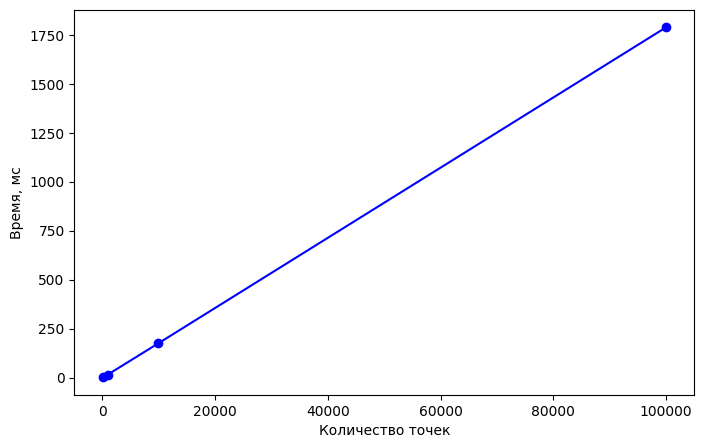

In [ ]:
x = [100, 1000, 10000, 100000]
y = [1.68, 14.73, 175.10, 1788.89]

plt.figure(figsize=(8, 5))  # Размер графика
plt.plot(x, y, marker='o', linestyle='-', color='b')

plt.xlabel("Количество точек")
plt.ylabel("Время, мс")

Как мы можем наблюдать, зависимость линейная, с учëтом погрешности.

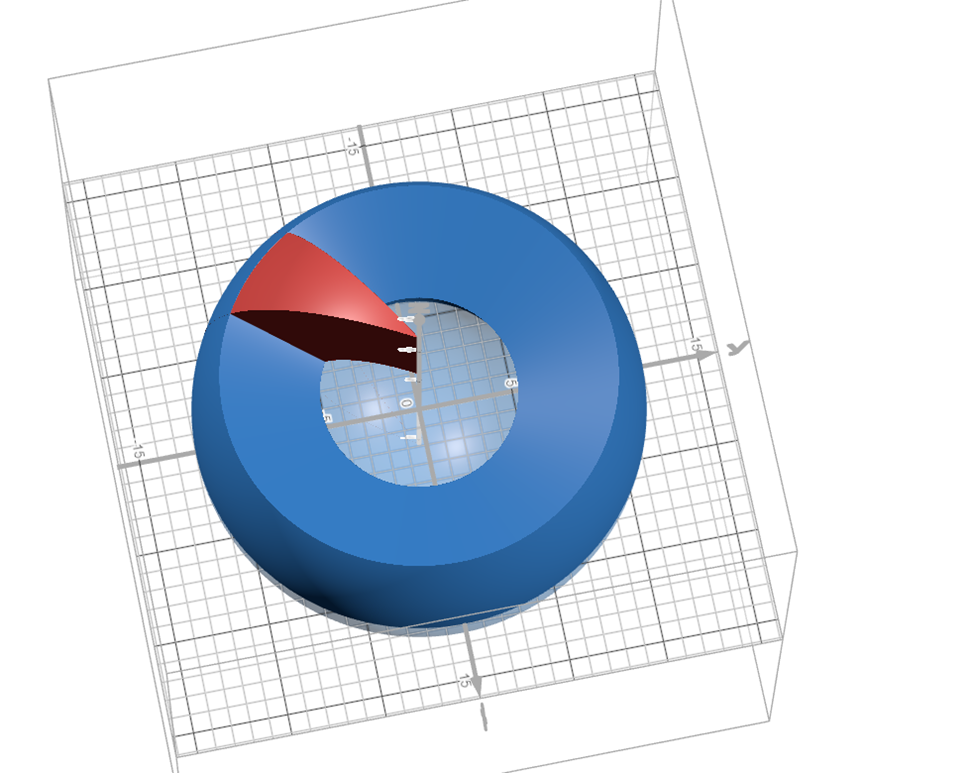

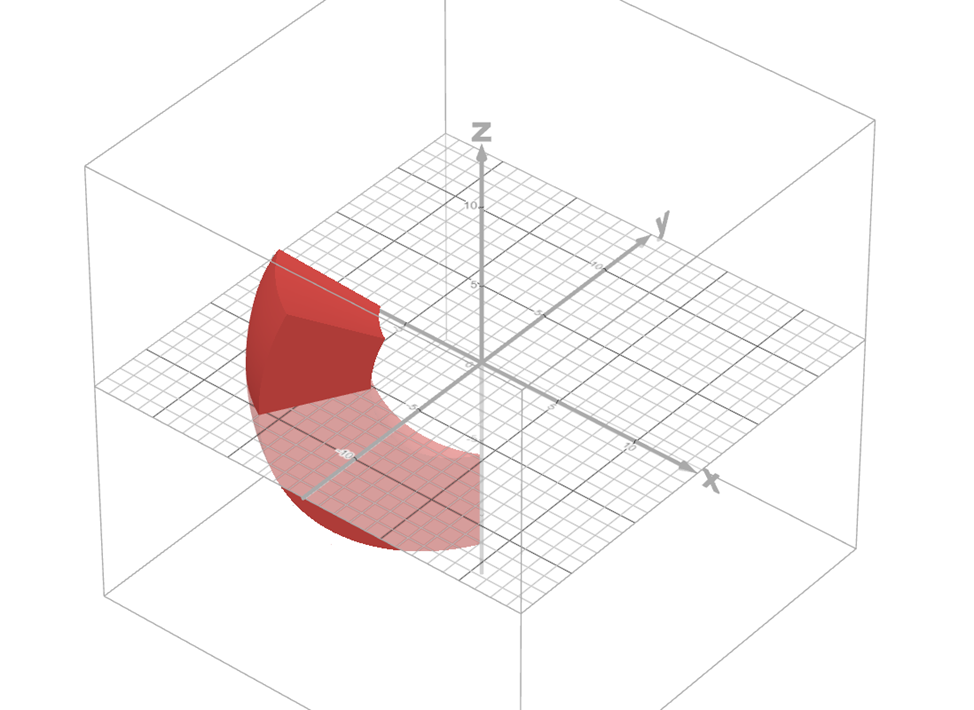

## Лаб 3

### Задание 4

Численные методы решения обыкновенных дифференциальных уравнений

#### Реализация

In [ ]:
# Инициализация переменных
function = "(12*y-(5*(x^2)+3)*(y^3))/(8*x)"
text_input = None # Поле ввода функции
eps_input = None # Поле ввода точности
function_simpy = None
method = -1
sectionCurrent = 4.0 # Текущая длина отрезка
hCurrent = "0.1" # Текущий шаг
nCurrent = 10 # Текущее количество узлов
currentMethod = None # Текущий метод
a_bor = None
b_bor = None
x0Value = None
y0Value = None
resultsGlobal = None # Результаты
primaryFunction = None # Изначальная функция
errorCurrent = None # Погрешность

x, y = sp.symbols('x y')

# Стиль кнопок
layout = widgets.Layout(width="auto", height="auto")

# Инициализация кнопок
button1 = widgets.Button(description="Метод Эйлера", layout=layout)
button2 = widgets.Button(description="Метод Эйлера-Коши", layout=layout)
button3 = widgets.Button(description="Метод Рунге-Кутта 4-го порядка", layout=layout)
button4 = widgets.Button(description="Метод Адамса-Башфорта 4-го порядка", layout=layout)
button5 = widgets.Button(description="Вычислить", layout=layout)
button6 = widgets.Button(description="Вернуться к выбору метода", layout=layout)
button7 = widgets.Button(description="Сохранить таблицу в файл", layout=layout)
button8 = widgets.ToggleButton(description="Обновить", layout=layout)

sliderA = widgets.FloatSlider(value=0, min=-20, max=20, step=0.1, description='a:')
sliderB = widgets.FloatSlider(value=3, min=-20, max=20, step=0.1, description='b:')
sliderN = widgets.IntSlider(value=10, min=1, max=10000, step=1, description='К-во узлов:')

h_input = widgets.Text(value="0.1", description='Шаг: ')
eps_input = widgets.Text(value="", description='eps: ')
x0Field = widgets.Text(value="1")
y0Field = widgets.Text(value="1")
primaryFunction_input = widgets.Text(value="2/sqrt((x^2)+1)", description='y=')

button1.on_click(lambda b: [globals().update({"method": 1}), checkError(method)])
button2.on_click(lambda b: [globals().update({"method": 2}), checkError(method)])
button3.on_click(lambda b: [globals().update({"method": 3}), checkError(method)])
button4.on_click(lambda b: [globals().update({"method": 4}), checkError(method)])
button5.on_click(lambda b: calculateRunge())
button6.on_click(lambda b: [clear_output(wait=True), choseMethod()])
button7.on_click(lambda b: saveToFile())

In [ ]:
def saveToFile():
  global currentMethod, function, primaryFunction, resultsGlobal, errorCurrent
  if(primaryFunction == None):
    primaryFunc = "Не указана"
  else:
    primaryFunc = primaryFunction
  text = "Сведения: \nУравнение производной: " + str(function) + "\nУравнение вычисленной функции: " + str(primaryFunc) + "\nИспользованный метод: "
  match currentMethod:
    case 1:
      text = text + "Эйлера"
    case 2:
      text = text + "Эйлера-Коши"
    case 3:
      text = text + "Рунге-Кутта 4 порядка"
    case 4:
      text = text + "Адамса-Башфорта 4 порядка"
  text = text + "\nОтрезок: [" + str(a_bor) + ";" + str(b_bor) + "]\nНачальное значение: y(" + str(x0Value) + ") = " + str(y0Value) + "\nШаг: " + str(hCurrent) + "\nКоличество узлов: " + str(int(nCurrent)) + "\n"

  x_values = resultsGlobal[0]
  y_values = resultsGlobal[1]
  size = len(x_values)

  with open('results.txt', 'a', encoding='utf-8') as file:
    file.write(text)
    file.write("Результаты численного решения\n")

    # Определяем количество строк (по 11 значений в каждой)
    num_rows = (size + 10) // 11  # Округление вверх

    for row in range(num_rows):
        # Вычисляем индексы для текущей строки
        start_idx = row * 11
        end_idx = min((row + 1) * 11, size)

        # Формируем строку с x значениями
        x_str = "x:\t" + "\t".join(f"{x_values[i]:.8f}" for i in range(start_idx, end_idx))

        # Формируем строку с y значениями
        y_str = "y:\t" + "\t".join(f"{y_values[i]:.8f}" for i in range(start_idx, end_idx))

        # Записываем строки в файл
        file.write(x_str + "\n")
        file.write(y_str + "\n\n")  # Дополнительный отступ между блоками
    file.write("Погрешность по Рунге: " + str(errorCurrent))
    file.write("\n\n\n\n")

In [ ]:
def methodEiler(a, n, h):
  global function_simpy
  results = [[x0Value], [y0Value]]
  x = x0Value
  y = y0Value
  for i in range(0, n, 1):
    x, y = nextStepEiler(x, y, h, function_simpy)
    results[0].append(x)
    results[1].append(y)
  return results

def nextStepEiler(x, y, h, function):
  fy = function(x, y)
  x = x + h
  y = y + h*fy
  return x, y

In [ ]:
def methodEilerKoshi(a, n, h):
  global function_simpy
  results = [[x0Value], [y0Value]]
  x = x0Value
  y = y0Value
  yT = y0Value
  fyT = function_simpy(x, yT) # Следующая точка
  yT = yT + h*fyT
  for i in range(0, n, 1):
    x, y, yT = nextStepEilerKoshi(x, y, yT, h, function_simpy)
    results[0].append(x)
    results[1].append(y)
  return results

def nextStepEilerKoshi(x, y, yT, h, function):
  fy = function(x, y)
  x = x + h
  fyT = function(x, yT)
  yT = yT + h*fyT
  y = y + (h/2)*(fy+fyT)
  return x, y, yT

In [ ]:
def methodRungeKutt(a, n, h):
  global function_simpy
  results = [[x0Value], [y0Value]]
  x = x0Value
  y = y0Value
  for i in range(0, n, 1):
    x, y = nextStepRungeKutt(x, y, h, function_simpy)
    results[0].append(x)
    results[1].append(y)
  return results

def nextStepRungeKutt(x, y, h, function):
  fy1 = function(x, y)
  K1 = h*fy1
  fy2 = function(x+(h/2), y+(K1/2))
  K2 = h*fy2
  fy3 = function(x+(h/2), y+(K2/2))
  K3 = h*fy3
  fy4 = function(x+h, y+K3)
  K4 = h*fy4
  deltaY = (1/6)*(K1+2*K2+2*K3+K4)
  x = x + h
  y = y + deltaY
  return x, y

In [ ]:
def methodAdamsBashfort(a, n, h):
  global function_simpy
  results = methodRungeKutt(a, 3, h)
  fys = []
  fys.append(function_simpy(results[0][0], results[1][0]))
  fys.append(function_simpy(results[0][1], results[1][1]))
  fys.append(function_simpy(results[0][2], results[1][2]))
  fys.append(function_simpy(results[0][3], results[1][3]))
  x = results[0][3]
  y = results[1][3]

  for i in range(3, n, 1, i):
    x, y, fys = nextStepAdamsBashfort(x, y, fys, h, function_simpy)
    results[0].append(x)
    results[1].append(y)
  return results

def nextStepAdamsBashfort(x, y, fys, h, i, function):
  x = x + h
  y = y + (h/24)*(55*fys[i]-59*fys[i-1]+37*fys[i-2]-9*fys[i-3])
  fy = function(x, y)
  fys.append(fy)
  return x, y, fys

In [ ]:
# РУНГЕ

def rungeError(resultsH, results2H, currentMethod):
  p = 4 # Порядок метода
  match currentMethod:
    case 1:
      p = 1
    case 2:
      p = 2
    case 3:
      p = 4
  errors = []
  for i in range(0, len(resultsH[0]), 1):
    errors.append(abs(resultsH[1][i] - results2H[1][i*2])/(math.pow(2, p)-1)) # Формула погрешности
  maxError = max(errors)
  return maxError

def calculateRunge():
  global eps_input, sliderA, sliderN, h_input
  eps = correctFloat(eps_input.value)
  error = 1
  a = sliderA.value
  n = sliderN.value
  h = h_input.value
  if(eps != 0):
    resultsH = calculateDiffur(a, n, float(h))
    h = float(h)/2
    n = 2*n
    results2H = calculateDiffur(a, n, h)
    error = rungeError(resultsH, results2H)
    while(eps < error):
      sliderN.value = n
      h = float(h)/2
      n = 2*n
      results2H = calculateDiffur(a, n, h)
      error = rungeError(resultsH, results2H)
      resultsH = results2H
  else:
    print("Некорректная точность!")

In [ ]:
def printValues(results):
    x_values = results[0]
    y_values = results[1]
    size = len(x_values)

    # Определяем количество строк (по 11 значений в каждой)
    num_rows = (size + 10) // 11  # Округление вверх

    for row in range(num_rows):
        # Вычисляем индексы для текущей строки
        start_idx = row * 11
        end_idx = min((row + 1) * 11, size)

        # Формируем строку с x значениями
        x_str = "x:\t" + "\t".join(f"{x_values[i]:.8f}" for i in range(start_idx, end_idx))

        # Формируем строку с y значениями
        y_str = "y:\t" + "\t".join(f"{y_values[i]:.8f}" for i in range(start_idx, end_idx))

        # Выводим строки
        print(x_str)
        print(y_str)
        print()  # Пустая строка между блоками


In [ ]:
# ФУНКЦИИ ОТВЕЧАЮЩИЕ ЗА РАССЧЁТ С ИСПОЛЬЗОВАНИЕМ ШАГА

def correctFloat(float_num): # Проверка корректности шага, т.к. шаг = промежуток/кол-во точек
  try:
    float_num = float(float_num)
    if(float_num == 0):
      return 1
    return float_num
  except:
    return 1

def recalculteNH(n, h, section):
  global h_input, hCurrent, nCurrent, sectionCurrent, sliderN, h_input
  try:
    if((hCurrent != h) or (sectionCurrent != section)): # Пересчёт количества узлов по шагу
      hCurrent = h
      sectionCurrent = section
      hTemp = correctFloat(hCurrent)
      tempN = section / float(hTemp)
      sliderN.value = math.floor(tempN)
    elif(nCurrent != n): # Пересчёт шага по узлам
      nCurrent = n
      tempH = section / nCurrent
      h_input.value = str(tempH)
  except:
    pass

In [ ]:
def visualisation(results, title="График решения", xlabel="x", ylabel="y", grid=True, show=True):
  global resultsGlobal, primaryFunction
  try:
    plt.figure(figsize=(10, 6))

    # Извлекаем данные
    x = results[0]
    y = results[1]

    # Строим график
    plt.plot(x, y, 'b-', linewidth=2, label='Численное решение')
    plt.scatter(x, y, color='red', s=30, label='Точки расчета')

    if primaryFunction:
      # Определяем диапазон для аналитического решения
      x_min = min(x)
      x_max = max(x)

      # Создаем lambda-функцию для вычислений
      x_sym = sp.symbols('x')
      f_numeric = sp.lambdify(x_sym, primaryFunction, 'numpy')

      # Генерируем точки для гладкого графика
      x_analis = np.linspace(x_min, x_max, 500)
      try:
          y_analis = f_numeric(x_analis)
          plt.plot(x_analis, y_analis, 'r--', linewidth=2, label='Аналитическое решение')
      except Exception as e:
          print(f"Не удалось построить аналитическое решение: {e}")

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(grid)
    plt.legend(fontsize=12)

    plt.tight_layout()
  except:
    pass

In [ ]:
def diffurProgram():
  choseMethod()

def choseMethod():
  global text_input
  global function
  print("\n!!!ЕСЛИ РЕЗУЛЬТАТЫ ПРОГРАММЫ ДВОЯТСЯ, ПЕРЕЗАПУСТИТЕ ЯЧЕЙКУ С ФУНКЦИЕЙ 'diffurProgram()'. Я ТАК И НЕ ПОНЯЛ, КАК ЭТО ПОФИКСИТЬ!!!\nЭта программа, увы, не может выразить производную из функции, поэтому придётся посчитать ручками и записать готовую функцию производной.")
  label = widgets.Label("Уравнение производной: y'=")
  text_input = widgets.Text(value=str(function))
  text_input.disabled = False
  display(widgets.HBox([label, text_input]))
  print("Выберите численный метод")
  display(widgets.HBox([button1, button2, button3, button4]))

def checkError(method):
  try:
    global text_input
    global function
    global function_simpy
    function = text_input.value
    function = sp.simplify(function)
    function_simpy = sp.lambdify((x, y), function, 'numpy') # Конвертация в числовую функцию
    text_input.value = str(function)
    calculateInterface(method)
  except:
    clear_output()
    print("Ошибка ввода функции")
    choseMethod()

def calculateInterface(method):
  global text_input
  global h_input
  global x0, y0
  global currentMethod # Текущий метод
  currentMethod = method
  clear_output()
  print("Функция")
  text_input.disabled = True # Блокировка ввода
  display(text_input)

  display(widgets.HBox([eps_input, button5])) # Подсчёт по правилу Рунге
  print("Для автоматичечского вычисления шага на отрезке через погрешность по правилу Рунге введите значение выше и нажмите на кнопку 'Вычислить'.")

  if not hasattr(calculateInterface, 'interactive_widget'): # Поиск кэшированного объекта
    calculateInterface.interactive_widget = widgets.interactive(puppetMenu, a=sliderA, b=sliderB, x0=x0Field, y0=y0Field, n=sliderN, h=h_input, pFunction=primaryFunction_input, reload=button8)
  display(widgets.VBox(calculateInterface.interactive_widget.children[0:2]), 'Начальные условия:', widgets.HBox(calculateInterface.interactive_widget.children[2:4]), widgets.HBox(calculateInterface.interactive_widget.children[4:6]), 'Если вам известна точная функция, вы можете ввести её здесь: ', calculateInterface.interactive_widget.children[6], calculateInterface.interactive_widget.children[7])

  display(button7)
  display(button6)

  display(calculateInterface.interactive_widget.children[-1])

def puppetMenu(a, b, x0, y0, n, h, pFunction, reload):
  try:
    global a_bor, b_bor, x0Value, y0Value, resultsGlobal, errorCurrent, primaryFunction, currentMethod
    if(sliderA.value > sliderB.value):
      a_bor, b_bor = sliderB.value, sliderA.value
    else:
      a_bor, b_bor = sliderA.value, sliderB.value
    x0Value = float(a_bor) # Проверка на корректность
    x0Field.value = str(a_bor)
    try:
      y0Value = sp.parsing.parse_expr(str(y0)).evalf(8) # Приведение значения в число
      y0Value = correctFloat(y0Value)
    except:
      y0Value = 1
    section = b_bor-a_bor
    recalculteNH(n, h, section)
    print("Проверьте итоговые условия. Если где-то есть неточности, значит при вводе данных была совершена ошибка.\nНачальные условия y(" + str(x0Value) + ") = " + str(y0Value) + "\nОтрезок [" + str(a_bor) + ";" + str(b_bor) + "]\nКоличество узлов: " + str(nCurrent) + "\nШаг: " + str(hCurrent))
    resultsH = calculateDiffur(a, n, float(h))
    results2H = calculateDiffur(a, 2*n, float(h)/2)

    # Визуализация
    visualisation(results=resultsH)
    primaryFunction = sp.simplify(pFunction)

    error = rungeError(resultsH, results2H, currentMethod)
    errorCurrent = error
    print("Погрешность: " + str(error))
    resultsGlobal = resultsH
    printValues(resultsH)
  except:
    pass

def calculateDiffur(a, n, h):
  a = a_bor
  global currentMethod

  match currentMethod:
    case 1:
      results = methodEiler(a, n, h)  # Вызов нужной формулы в зависимости от выбранного метода
    case 2:
      results = methodEilerKoshi(a, n, h)
    case 3:
      results = methodRungeKutt(a, n, h)
    case 4:
      results = methodAdamsBashfort(a, n, h)

  return results

#### Запуск программы

In [ ]:
diffurProgram()


!!!ЕСЛИ РЕЗУЛЬТАТЫ ПРОГРАММЫ ДВОЯТСЯ, ПЕРЕЗАПУСТИТЕ ЯЧЕЙКУ С ФУНКЦИЕЙ 'diffurProgram()'. Я ТАК И НЕ ПОНЯЛ, КАК ЭТО ПОФИКСИТЬ!!!
Эта программа, увы, не может выразить производную из функции, поэтому придётся посчитать ручками и записать готовую функцию производной.


Выберите численный метод


Погрешности

$$
\begin{array}{|c|c|c|}
\hline
\text{Шаг h} & \text{Метод Эйлера} & \text{Метод Эйлера-Коши} & \text{Метод Ронге-Кутта 4 порядка} & \text{Метод Адамса-Башфорта 4 порядка} \\
\hline
0,1 & 2.566e-3 & 6.246e-4 & 2.954e-7 & 2.412e-6 \\
\hline
0,01 & 2.482e-4 & 5.832e-5 & 2.538e-11 & 2.740e-10 \\
\hline
0,001 & 2.475e-5 & 5.784e-6 & 2.827e-14 & 2.825e-14 \\
\hline
\end{array}
$$

Диффуры второго порядка. К сожалению, без интерфейса и пользовательского взаимодействи. Все данные вводятся в первые строчки кода.

In [ ]:
def methodEiler2(a, b, h, x0, y0, z0):
  n = math.floor(abs(a-b)/h)
  x = x0
  y = y0
  z = z0
  results = [[x0],[y0]]
  y = y + h * z # Из-за особенностей
  results[0].append(x+h)
  results[1].append(y)
  for i in range(0, n-1, 1):
    x, z = nextStepEiler(x, z, h, functionZ)
    y = y + h * z # Из-за особенностей
    results[0].append(x+h)
    results[1].append(y)
  return results

def methodEilerKoshi2(a, b, h, x0, y0, z0):
  n = math.floor(abs(a-b)/h)
  x = x0
  y = y0
  z = z0
  yT = y + h * z # Слеующая точка
  zT = z + h * functionZ(x, z)
  results = [[x0],[y0]]
  y = y + (h/2)*(zT + z)
  results[0].append(x+h)
  results[1].append(y)
  for i in range(0, n-1, 1):
    x, z, zT = nextStepEilerKoshi(x, z, zT, h, functionZ) # Следующий z_i
    y = y + (h/2)*(z + zT)
    results[0].append(x+h)
    results[1].append(y)
  return results

def methodRungeKutt2(a, b, h, x0, y0, z0):
  n = math.floor(abs(a-b)/h)
  x = x0
  y = y0
  z = z0
  results = [[x0],[y0],[z0]]
  L1 = h * functionZ(x, z)
  L2 = h * functionZ(x + h/2, z + L1/2)
  L3 = h * functionZ(x + h/2, z + L2/2)
  L4 = h * functionZ(x + h, z + L3)
  K1 = h * z
  K2 = h * (z + L1/2)
  K3 = h * (z + L2/2)
  K4 = h * (z + L3)
  deltaY = (1/6)*(K1 + 2*K2 + 2*K3 + K4)
  y = y + deltaY
  deltaZ = (1/6)*(L1 + 2*L2 + 2*L3 + L4)
  z = z + deltaZ
  results[0].append(x+h)
  results[1].append(y)
  results[2].append(z)
  for i in range(0, n-1, 1):
    x = x + h
    L1 = h * functionZ(x, z)
    L2 = h * functionZ(x + h/2, z + L1/2)
    L3 = h * functionZ(x + h/2, z + L2/2)
    L4 = h * functionZ(x + h, z + L3)
    K1 = h * z
    K2 = h * (z + L1/2)
    K3 = h * (z + L2/2)
    K4 = h * (z + L3)
    deltaY = (1/6)*(K1 + 2*K2 + 2*K3 + K4)
    y = y + deltaY
    deltaZ = (1/6)*(L1 + 2*L2 + 2*L3 + L4)
    z = z + deltaZ
    results[0].append(x+h)
    results[1].append(y)
    results[2].append(z)
  return results

def methodAdamsBashfort2(a, b, h, x0, y0, z0):
  n = math.floor(abs(a-b)/h)
  results = methodRungeKutt2(a, a+h*4, h, x0, y0, z0)
  fzs = []
  fzs.append(functionZ(results[0][0], results[2][0]))
  fzs.append(functionZ(results[0][1], results[2][1]))
  fzs.append(functionZ(results[0][2], results[2][2]))
  fzs.append(functionZ(results[0][3], results[2][3]))
  results[0] = results[0][:4]
  results[1] = results[1][:4]
  results[2] = results[2][:4]
  x = results[0][3]
  y = results[1][3]
  z = results[2][3]
  y = y + (h/24)*(55*results[2][3]-59*results[2][2]+37*results[2][1]-9*results[2][0]) # Первый y
  results[0].append(x+h)
  results[1].append(y)
  for i in range(3, n-1, 1):
    x, z, fzs = nextStepAdamsBashfort(x, z, fzs, h, i, functionZ)
    results[2].append(z)
    y = y + (h/24)*(55*results[2][i+1]-59*results[2][i]+37*results[2][i-1]-9*results[2][i-2])
    results[0].append(x+h)
    results[1].append(y)
  return results

In [ ]:
# Условия
functionZ = "-z/(x-1)"
x0 = 2
y0 = 2
z0 = 1
a = 2
b = 3


print("Дано:")
print("z'=" + functionZ + "\ny'=z\ny(" + str(x0) + ")=" + str(y0) + "\nz(" + str(x0) + ")=" + str(z0) + "\n[" + str(a) + ":" + str(b) + "]")

x, y, z = sp.symbols('x y z')
functionZ = sp.simplify(functionZ)
functionZ = sp.lambdify((x, z), functionZ, 'numpy')


print("Введите h")
h = float(input())

results = methodEiler2(a, b, h, x0, y0, z0)
results2H = methodEiler2(a, b, h/2, x0, y0, z0)
error = rungeError(results, results2H, 1)
print("\n\n\n\nМетод Эйлера: ")
printValues(results)
# printValues(results2H)
print("Погрешность:" + str(error))

results = methodEilerKoshi2(a, b, h, x0, y0, z0)
results2H = methodEilerKoshi2(a, b, h/2, x0, y0, z0)
error = rungeError(results, results2H, 2)
print("\n\n\n\nМетод Эйлера-Коши: ")
printValues(results)
# printValues(results2H)
print("Погрешность:" + str(error))

results = methodRungeKutt2(a, b, h, x0, y0, z0)
results2H = methodRungeKutt2(a, b, h/2, x0, y0, z0)
error = rungeError(results, results2H, 4)
print("\n\n\n\nМетод Ронге-Кутта: ")
printValues(results)
# printValues(results2H)
print("Погрешность:" + str(error))

results = methodAdamsBashfort2(a, b, h, x0, y0, z0)
results2H = methodAdamsBashfort2(a, b, h/2, x0, y0, z0)
error = rungeError(results, results2H, 4)
print("\n\n\n\nМетод Адамса-Башфорта: ")
printValues(results)
# printValues(results2H)
print("Погрешность:" + str(error))


Дано:
z'=-z/(x-1)
y'=z
y(2)=2
z(2)=1
[2:3]
Введите h
0.1




Метод Эйлера: 
x:	2.00000000	2.10000000	2.20000000	2.30000000	2.40000000	2.50000000	2.60000000	2.70000000	2.80000000	2.90000000	3.00000000
y:	2.00000000	2.10000000	2.19000000	2.27181818	2.34681818	2.41604895	2.48033467	2.54033467	2.59658467	2.64952584	2.69952584

Погрешность:0.00558913831740071




Метод Эйлера-Коши: 
x:	2.00000000	2.10000000	2.20000000	2.30000000	2.40000000	2.50000000	2.60000000	2.70000000	2.80000000	2.90000000	3.00000000
y:	2.00000000	2.09500000	2.18136364	2.26054752	2.33366765	2.40159804	2.46503602	2.52454690	2.58059535	2.63356798	2.68378991

Погрешность:0.0016428313178864506




Метод Ронге-Кутта: 
x:	2.00000000	2.10000000	2.20000000	2.30000000	2.40000000	2.50000000	2.60000000	2.70000000	2.80000000	2.90000000	3.00000000
y:	2.00000000	2.09530990	2.18232110	2.26236370	2.33647159	2.40546441	2.47000289	2.53062748	2.58778588	2.64185308	2.69314636

Погрешность:5.1157303252817127e-08




Метод Адамса-Башфорта: 


## Лаб 4

### Задание 1 (Метод сеток для краевой задачи)

#### Реализация

In [ ]:
# Граничные значения
x0 = 1
y0 = 1
x1 = 2
y1 = 0.5

# Имеются следующие значения, вычисленные аналитическим способом
a01 = 1
b01 = 0
Y01 = 1
a02 = 0
b02 = 1
Y02 = 0.5
H = None
N = None
x, h = sp.symbols('x h')

y_n = -(2+3*x*h**2) # Зависит от x только y_n
t_n = h**2*(2-8*x)/(x**3) # Обнуляем
y_n_minus_1 = 1 + h
y_n_plus_1 = 1 - h

def methodProgonki():
  global y_n, y_n_minus_1, y_n_plus_1, H, y_ns, x0, x1, y0, y1, N

  y_ns = []
  t_ns = []
  y_n = -(2+3*x*h**2) # Обнуляем
  t_n = h**2*(2-8*x)/(x**3) # Обнуляем

  print("Введите шаг h")
  H = float(input())
  N = int((x1-x0)/H)

  x_values = [x0 + H * i for i in range(int((x1 - x0) / H) + 1)]

  y_n = y_n.subs(h, H)
  y_n = sp.simplify(y_n) # Переводим в символьную функцию
  y_n = sp.lambdify((x), y_n, "numpy")

  t_n = t_n.subs(h, H)
  t_n = sp.simplify(t_n) # Переводим в символьную функцию
  t_n = sp.lambdify((x), t_n, "numpy")

  y_n_minus_1 = y_n_minus_1.subs(h, H)

  y_n_plus_1 = y_n_plus_1.subs(h, H)

  for x_val in x_values:
    y_ns.append(y_n(x_val))
    t_ns.append(t_n(x_val))

  X_n = [-b01/a01]
  Z_n = [Y01/a01]


  for i in range(2, N+1, 1):
    X_n.append(-(y_n_minus_1)/(y_ns[i-1]+y_n_plus_1*X_n[i-2]))
    Z_n.append((t_ns[i-1]-y_n_plus_1*Z_n[i-2])/(y_ns[i-1]+y_n_plus_1*X_n[i-2]))

  y_s = [(Y02-a02*Z_n[len(Z_n)-1])/(b02+a02*X_n[len(X_n)-1])]

  for i in range(len(X_n)-1, -1, -1):
    y_s.append(X_n[i]*y_s[-1]+Z_n[i])

  return [y_s, x_values, X_n, Z_n]

#### Запуск

In [ ]:
results = methodProgonki()

print("\nx_n\t\t\ty_n")
for i in range(0, len(results[0]), 1):
  print(str(round(results[1][i], 5)) + "\t\t" + str(results[0][i]))

Введите шаг h
0.001

x_n			y_n
1.0		0.500000000000000
1.001		0.499993837249773
1.002		0.499987690373846
1.003		0.499981559382948
1.004		0.499975444287826
1.005		0.499969345099250
1.006		0.499963261828013
1.007		0.499957194484926
1.008		0.499951143080824
1.009		0.499945107626564
1.01		0.499939088133022
1.011		0.499933084611099
1.012		0.499927097071715
1.013		0.499921125525813
1.014		0.499915169984358
1.015		0.499909230458336
1.016		0.499903306958756
1.017		0.499897399496649
1.018		0.499891508083066
1.019		0.499885632729083
1.02		0.499879773445796
1.021		0.499873930244325
1.022		0.499868103135810
1.023		0.499862292131415
1.024		0.499856497242325
1.025		0.499850718479750
1.026		0.499844955854919
1.027		0.499839209379085
1.028		0.499833479063524
1.029		0.499827764919534
1.03		0.499822066958437
1.031		0.499816385191575
1.032		0.499810719630315
1.033		0.499805070286046
1.034		0.499799437170180
1.035		0.499793820294152
1.036		0.499788219669419
1.037		0.499782635307463
1.038		0.499777067219786